# FordGoBike Data Exploration
## by Islam Soliman

## Investigation Overview

> In this investigation of the Ford GoBike System, I performed the analysis against the most common customer behaviors and characteristics, specifically how user type, and time impacts the usage of the bike share system.

## Dataset Overview

> Ford GoBike is the San Francisco Bay Area's bike share system. The Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes covering 70 stations across San Francisco and San Jose. It is now called **Baywheels**.
<br><br>Baywheels, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.
<br><br>The bikes are available for use 24/7 all year round, and riders have access to all bikes in the network when they become a member or purchase a pass.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import zipfile
import requests
import io

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
base_color = sb.color_palette()[0]
sb.set_style("darkgrid")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('wrangled_baywheels_2020.csv')
df.head()

,duration_sec,duration_min,duration_hrs,duration_days,start_time,end_time,start_day,end_day,start_hour,end_hour,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,rental_access_method,month
0,62083,1034,17,0.718553,2020-02-29 18:32:30.575,2020-03-01 11:47:14.085,Saturday,Sunday,18,11,176.0,MacArthur BART Station,267.0,Derby St at College Ave,1993,Customer,NaN,february
1,1364,22,0,0.015787,2020-02-29 23:53:53.719,2020-03-01 00:16:37.972,Saturday,Sunday,23,0,375.0,Grove St at Masonic Ave,506.0,7th Ave at Clement St,12402,Customer,NaN,february
2,836,13,0,0.009676,2020-02-29 23:54:03.197,2020-03-01 00:07:59.849,Saturday,Sunday,23,0,375.0,Grove St at Masonic Ave,454.0,7th Ave at Cabrillo St,2302,Customer,NaN,february
3,1004,16,0,0.011620,2020-02-29 23:48:34.648,2020-03-01 00:05:19.202,Saturday,Sunday,23,0,179.0,Telegraph Ave at 27th St,200.0,2nd Ave at E 18th St,902,Customer,NaN,february
4,1007,16,0,0.011655,2020-02-29 23:48:25.900,2020-03-01 00:05:13.449,Saturday,Sunday,23,0,179.0,Telegraph Ave at 27th St,200.0,2nd Ave at E 18th St,11578,Customer,NaN,february


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage Per Hour

The bikes were mostly used during the morning hours of `8-9AM`, and at the afternoon hours of `4-6PM`, which is a typical workday in the United States.
<br>This furthers the suggestion that the bikes are being used primarily for commuters.

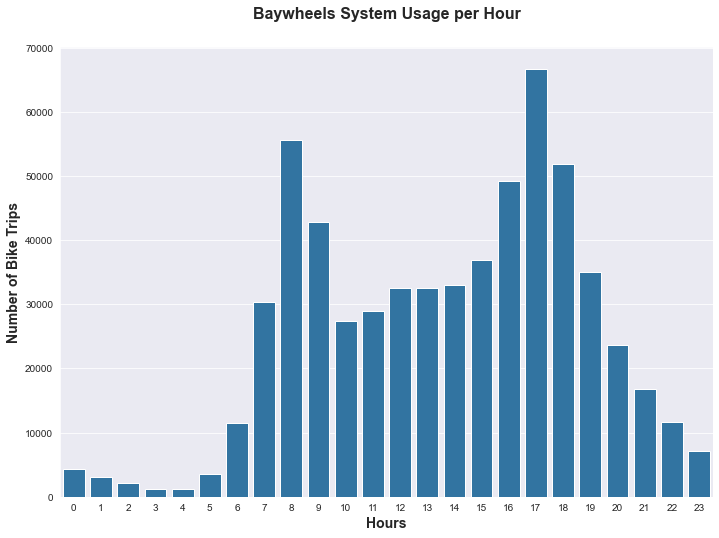

In [4]:
plt.figure(figsize=[11.69, 8.27])
sb.countplot(data = df, x = 'start_hour', color = base_color)
plt.title('Baywheels System Usage per Hour', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Hours', fontsize=14, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=14, fontweight='bold');

## Average Trip Time in Minutes

The **`average trip time`** is about `10 minutes`, with **`75% of trips`** duration being under `15 minutes`. Looking at the histogram, **`most rides`** fall in between the `3 - 13 minute range`.<br>This suggests riders are using the bikes for short distances.

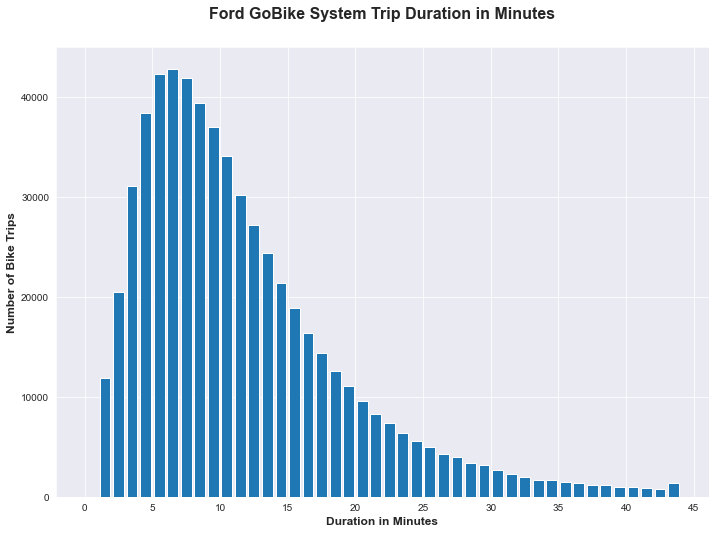

In [5]:
plt.figure(figsize=[11.69, 8.27])
bin_edges = np.arange(0, 45, 1) 
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
lables = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.8,  color = base_color)
plt.title('Ford GoBike System Trip Duration in Minutes', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration in Minutes', fontsize=12, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=12, fontweight='bold')
plt.xticks(ticks, lables);

### Ford GoBike System - Customers Vs Subscribers
The majority of users of the Baywheels Bike System are `Subscribers 61.3%` i.e. customers who subscribe to the monthly membership. While `customers` who pays by trip are `38.7%`.

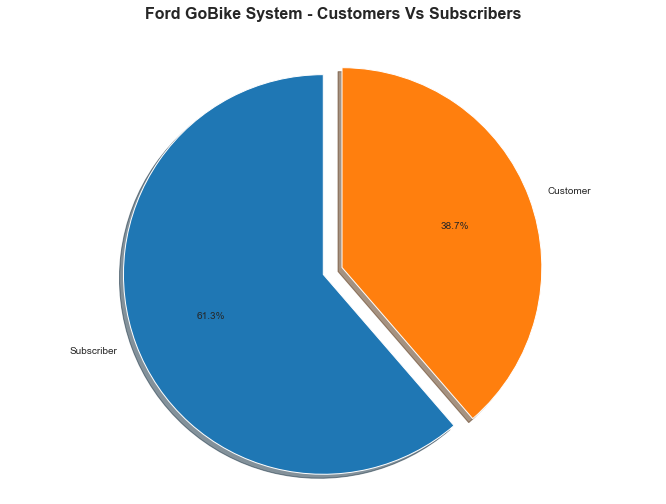

In [6]:
plt.figure(figsize = [11.69, 8.27])
labls = df["user_type"].value_counts().index
explode = (0.1, 0)

plt.pie(df["user_type"].value_counts(), explode=explode, labels=labls, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Ford GoBike System - Customers Vs Subscribers', y=1.05, fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

## Ford GoBike System Trends by User Type
This point plot is an excellent visual showing the *sharp contrast* between `Customers and Subscribers`.
<br>`Customers` have a relatively *`low usage`* of the Baywheels system with a sharp decline on the weekends.
<br>`Subscribers` are the opposite, there is a steadily *`high usage`* on weekdays, with a minute increase on the weekend.

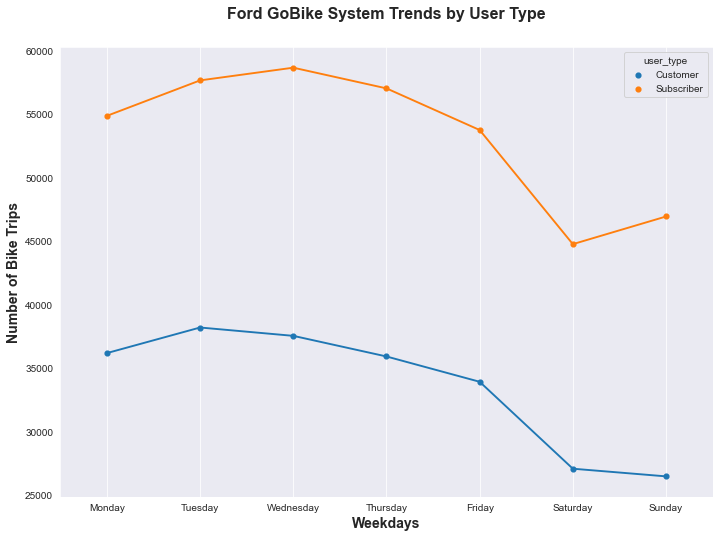

In [7]:
plt.figure(figsize=(11.69, 8.27))

df_user_week = df.groupby(['start_day', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sb.pointplot(data=df_user_week, x='start_day', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays', fontsize=14, fontweight='bold')
plt.ylabel('Number of Bike Trips', fontsize=14, fontweight='bold')
plt.grid();

### Ford GoBike System - Customers vs. Subscribers Ride Duration in Minutes
This plot shows the ride duration spread in minutes.
<br>Both `customers and subscribers` have used the Bike sharing system almost *`equal`* in duration, less than or equal to 60 minutes.

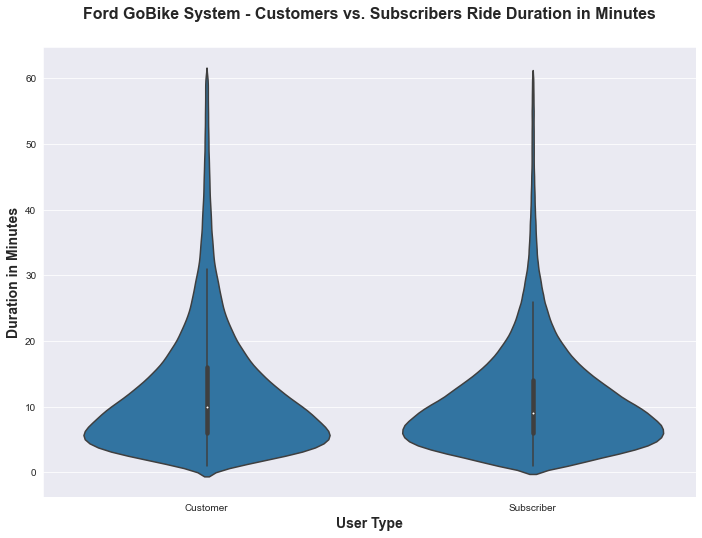

In [8]:
plt.figure(figsize=(11.69, 8.27))
data = df.query('duration_min <= 60')

sb.violinplot(data=data, x='user_type', y='duration_min', color = base_color)

plt.title('Ford GoBike System - Customers vs. Subscribers Ride Duration in Minutes', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('User Type', fontsize=14, fontweight='bold')
plt.ylabel('Duration in Minutes', fontsize=14, fontweight='bold');

### Summary
This project is a *win - win situation* where the company and a large number of people can benefit from this program:

- **Subscribers** `61.3%` (i.e. daily commuters) benefit from a healthy commuting choice.
- **Customers** `38.7%` (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.
- The use of the service peaks mainly at `08:00AM` and `05:00PM`. This is due to work and school times in the United States.
- **Weekdays** shows *`more demand`* for the service, while **weekends** witness the *`lowest utilisation`* of service.
- The majority of **trip duration** falls between *`20 minutes or less`*.
- The busiest day of week is **Monday**.
- The **average** subscriber **trip duration** is about *`10 minutes`* and it seems to be fixed within that range without major fluctuations.
- The **variation** for *`customers`* tends to be more that that of *`subscribers`*.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert slides.ipynb --to slides --post serve --no-input --no-prompt